<a href="https://colab.research.google.com/github/johanesraphaeln/kmeans/blob/main/Case_Based_2_KMeans_1301204243_Johanes_Raphael_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as mp
import seaborn as sns 

# Load Data

In [ ]:
#file water-treatment
plant = pd.read_csv(
    'https://github.com/johanesraphaeln/kmeans/blob/main/dataset/water-treatment.data?raw=true',
    header = None
)

In [ ]:
#isi nama kolom
columns=['Date','Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E','SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 
      'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 
      'SED-D', 'COND-D', 'PH-S','DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
      'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
plant.columns = columns

In [ ]:
#5 baris data pertama
plant.head(5)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
#5 baris data terakhir
plant.tail(5)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8
526,D-30/8/91,30488,0.21,7.5,152,300,132,69.7,?,1073,...,1224,?,69.5,?,81.7,76.4,?,81.7,86.4,?


**Deskripsi Data**

In [ ]:
#info data
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

Korelasi

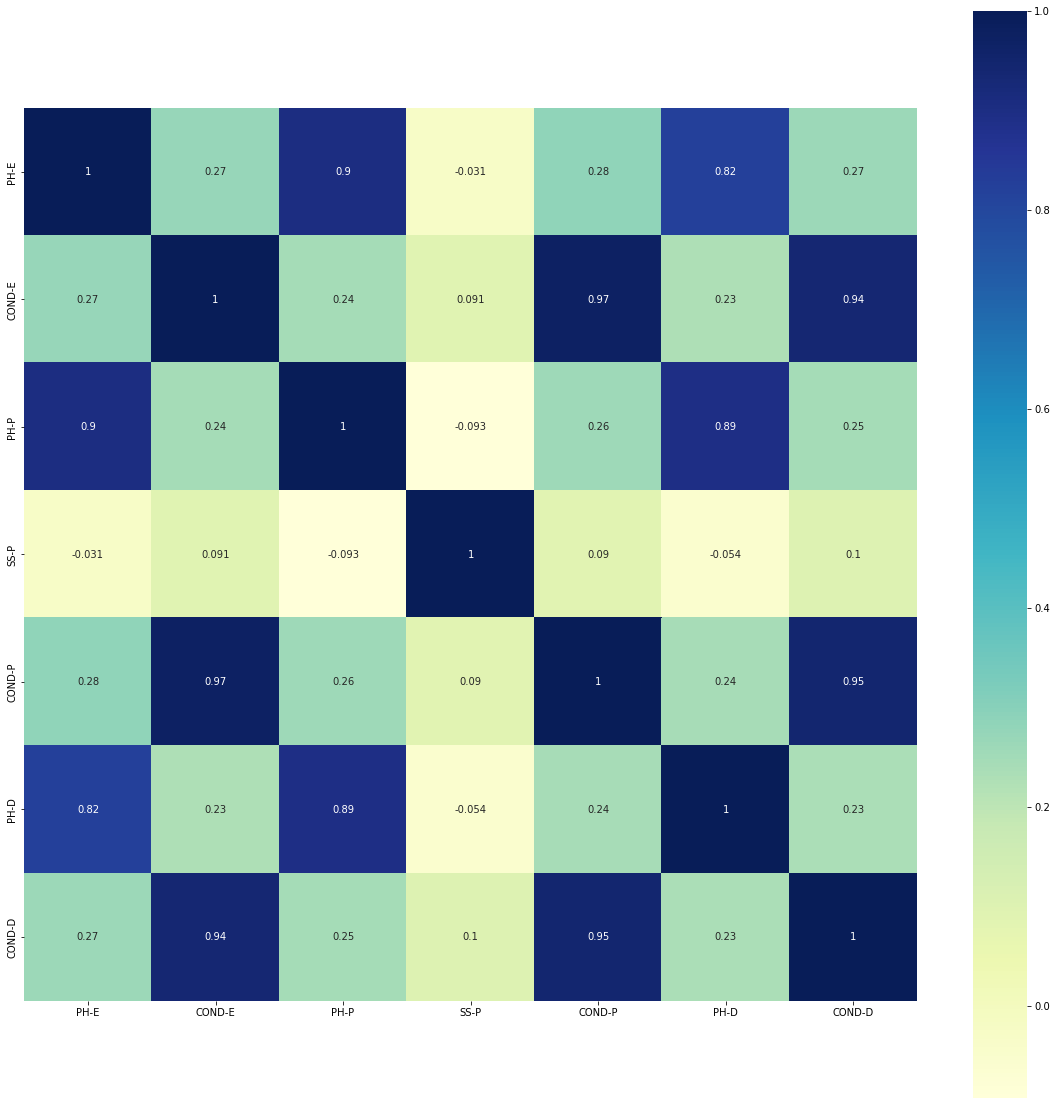

In [ ]:
mp.subplots(figsize=(20,20))
sns.heatmap(plant.corr(), cmap="YlGnBu", annot=True, square=True)

# Data Pre-Processing

**Data Cleaning**

In [ ]:
#ubah datum '?' menjadi NaN 
plant = plant.replace('?', np.NaN)
plant.isnull().sum()

Date         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
#ubah data tipe object menjadi numeric dan mengisi data NaN dengan mean
cols = plant.columns[plant.dtypes.eq('object')]
plant[cols] = plant[cols].apply(pd.to_numeric, errors='coerce')
plant = plant.fillna(plant.mean())
plant

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,NaN,44101.0,1.50,7.8,188.714286,407.0,166.0,66.3,4.500000,2110,...,2000.0,39.085806,58.8,95.5000,83.448049,70.0,89.013646,79.4,87.3,99.60000
1,NaN,39024.0,3.00,7.7,188.714286,443.0,214.0,69.2,6.500000,2660,...,2590.0,39.085806,60.7,94.8000,83.448049,80.8,89.013646,79.5,92.1,100.00000
2,NaN,32229.0,5.00,7.6,188.714286,528.0,186.0,69.9,3.400000,1666,...,1888.0,39.085806,58.2,95.6000,83.448049,52.9,89.013646,75.8,88.7,98.50000
3,NaN,35023.0,3.50,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,...,1840.0,33.100000,64.2,95.3000,87.300000,72.3,90.200000,82.3,89.6,100.00000
4,NaN,36924.0,1.50,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,...,2120.0,39.085806,62.7,95.6000,83.448049,71.0,92.100000,78.2,87.5,99.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,NaN,32723.0,0.16,7.7,93.000000,252.0,176.0,56.8,2.300000,894,...,942.0,39.085806,62.3,93.3000,69.800000,75.9,79.600000,78.6,96.6,99.60000
523,NaN,33535.0,0.32,7.8,192.000000,346.0,172.0,68.6,4.000000,988,...,950.0,39.085806,58.3,97.8000,83.000000,59.1,91.100000,74.6,90.7,100.00000
524,NaN,32922.0,0.30,7.4,139.000000,367.0,180.0,64.4,3.000000,1060,...,1136.0,39.085806,65.0,97.1000,76.200000,66.4,82.000000,77.1,88.9,99.00000
525,NaN,32190.0,0.30,7.3,200.000000,545.0,258.0,65.1,4.000000,1260,...,1326.0,39.800000,65.9,97.1000,81.700000,70.9,89.500000,87.0,89.5,99.80000


**Redundant Data**

In [ ]:
#cek duplikat
plant.duplicated().sum()

0

**Feature Scaling**

In [ ]:
plant = ((plant - plant.min()) / (plant.max() - plant.min())) * 9 + 1

In [ ]:
plant.describe()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,0.0,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,NaN,5.888751,1.608730,5.550285,4.487539,4.410563,1.609950,7.040932,2.060237,3.888168,...,3.236412,5.412385,6.274985,9.078958,8.829277,7.265789,9.071354,7.690864,8.945797,9.870701
std,NaN,1.173137,0.738770,1.230875,1.342057,1.252408,0.639949,1.539872,0.677009,1.378085,...,1.067596,1.592922,1.264141,0.849508,0.880530,1.068570,0.788709,0.989558,0.824126,0.611862
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,5.121964,1.215569,4.500000,3.587224,3.569186,1.339267,6.346100,1.707865,2.919349,...,2.520661,4.502548,5.490088,8.917660,8.657803,6.849057,8.930233,7.279468,8.818182,9.886792
50%,NaN,5.706782,1.377246,5.500000,4.405405,4.338372,1.461780,7.367688,2.036517,3.634742,...,3.066116,5.412385,6.352423,9.346696,8.990751,7.405660,9.174419,7.787072,9.121212,9.957547
75%,NaN,6.584458,1.781437,6.500000,5.223587,5.118023,1.678534,8.069638,2.289326,4.563009,...,3.778237,6.394268,7.095815,9.580715,9.271676,7.943396,9.453488,8.300380,9.353535,10.000000
max,NaN,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Penerapan KMeans

Cari Cluster Optimum

In [ ]:
from sklearn.cluster import KMeans
plant.drop('Date', axis = 1, inplace = True)

In [ ]:
#elbow method menentukan nilai k
elbow = []
for k in range(1, 9):
  km = KMeans(n_clusters=k, init='k-means++', random_state=0)
  km.fit(plant)
  elbow.append(km.inertia_)

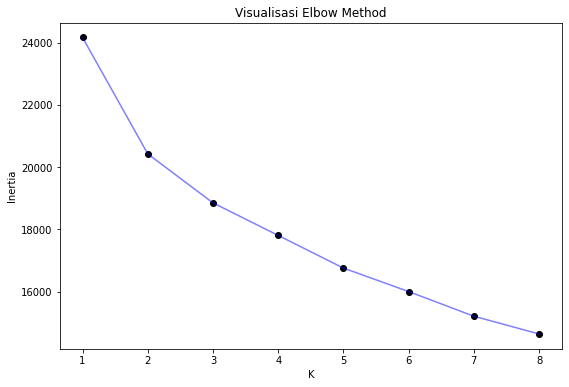

In [ ]:
#visualisasi elbow method
plt.figure(1, figsize=(9,6))
plt.plot(range(1,9), elbow, 'o', color='black')
plt.plot(range(1,9), elbow, '-', alpha = 0.5, color = 'blue')
plt.title('Visualisasi Elbow Method'), plt.xlabel('K'), plt.ylabel('Inertia')
plt.show()

inisiasi random centroids

In [ ]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(plant, 3)
centroids

,0,1,2
Q-E,6.313905,7.114409,5.245188
ZN-E,2.185629,2.320359,1.115868
PH-E,4.500000,7.000000,7.500000
DBO-E,6.439803,4.272727,4.692875
DQO-E,5.447674,4.631395,3.679070
SS-E,1.490052,1.424084,1.480628
SSV-E,6.452646,7.204735,7.505571
SED-E,2.036517,1.783708,2.036517
COND-E,2.008530,3.404420,1.282668
PH-P,4.750000,6.250000,6.250000


cari labels

In [ ]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [ ]:
distances = centroids.apply(lambda x: np.sqrt(((plant - x) ** 2).sum(axis=1)))
distances

,0,1,2
0,9.177287,8.662756,8.874286
1,13.165244,12.320165,12.292971
2,8.199185,9.667304,8.159498
3,10.932504,10.446785,10.297463
4,9.643451,9.235858,8.097848
...,...,...,...
522,10.352852,12.803541,10.573829
523,8.315767,10.611513,8.046987
524,8.961415,11.534062,9.491732
525,8.269268,11.557600,9.940325


In [ ]:
labels = get_labels(plant, centroids)
labels

0      1
1      2
2      2
3      2
4      2
      ..
522    0
523    2
524    0
525    0
526    0
Length: 527, dtype: int64

In [ ]:
labels.value_counts()

0    249
2    233
1     45
dtype: int64

**update centroids**

In [ ]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

visualisasi scatter plot

In [ ]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

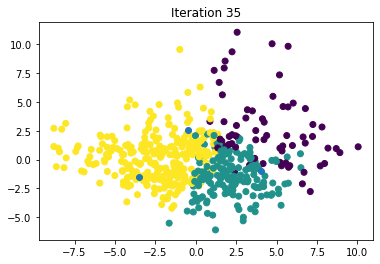

In [ ]:
max_iterations = 100
k = 3

centroids = random_centroids(plant, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(plant, centroids)
  centroids = new_centroids(plant, labels, k)
  plot_clusters(plant, labels, centroids, iteration)

  iteration += 1

In [ ]:
centroids

,0,1,2
Q-E,6.698515,5.507848,5.722464
ZN-E,1.600839,1.434750,1.538665
PH-E,5.270651,4.538549,6.026052
DBO-E,3.245115,3.752035,4.957074
DQO-E,3.134497,3.774630,4.849762
SS-E,1.930550,1.414453,1.545724
SSV-E,4.004015,7.161580,7.490910
SED-E,1.902298,1.823668,2.119617
COND-E,2.749978,3.180347,4.249030
PH-P,4.470686,3.450973,5.599643
